# Actividad Práctica 05: Herramientas Avanzadas de Python

Aplicando contenidos de `Webscrapping` y `Regex`. 

1. Las páginas a *scrapear* son las siguientes: www.yr.no y www.weather.com.
2. Las ciudades son Santiago, Boston y Oslo.
3. La variable a *scrapear* es el viento (velocidad).
4. Hacer la función.

Para desarrollar esto usaremos entonces 6 links distintos. Uno para cada ciudad y página. De esta forma usando expresiones regulares y web-scrapping podremos extraer la información de viento en su unidad de velocidad, para ambas páginas, para distintos días.

Antes que nada instalemos las librerías a utilizar.


#### Instalación de Librerías

In [1]:
!pip3 install pyrematch

## Paso I: Obtener variable metereológica seleccionada.

Partamos con lo primero que es más que nada obtener la variable metereológica obtenida por mi. Para ello partiremos con la página web de weather.com. El link que se utilizará es el específico del pronóstico para los días que se vienen para Oslo, Noruega. Los pasos llevados a cabo para extraer la info de Oslo, debieran ser los mismos para las otras 2 ciudades, ya que es probable que la plataforma, cumpla con el mismo formato para las otras ciudades.

Los pasos a seguir para yr.no serán distintos.

<!doctype html><html dir="ltr" lang="es-CL"><head>
      <script type='text/javascript' >window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"e6bbbab7f0","applicationID":"390783839","applicationTime":476.371772,"transactionName":"Z1RQNhBXC0FUWkQIW14ecRcRQgpfGgNcDldRXVdNFl8AX0VWH1AEVFhTEU1aSghZVlMoUA==","queueTime":0,"ttGuid":"5acefeaa77f420","agentToken":null}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:false}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"e6bbbab7f0",applicationID:"390783839"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(e,t,n){function r(){}function i(e,t,n){return function(){return o(e,[u.now()].con
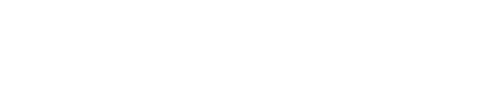
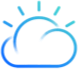

In [2]:
import urllib.request as net
import ssl

class WebDownloader:
    
    def __init__(self, link):
        self.user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
        self.url =  link
        
        
    def getHtmlAsString(self):
        headers = {'User-Agent':self.user_agent}
        request= net.Request(self.url,None,headers)
        gcontext = ssl.SSLContext()
        response = net.urlopen(request,context=gcontext)
        return response.read().decode('utf-8')
    
wd = WebDownloader('https://weather.com/es-CL/tiempo/10dias/l/91bd58d378e68f0f8e4037428d76095f05cb5d31e1d0e6b3ea8bea36540fe81a#detailIndex5')
sourceCode = wd.getHtmlAsString()
print(sourceCode)

Habiendo obtenido nuestra sopa, procedemos a extraer la información de viento, para ello debemos primero inspeccionar el elemento de viento en km/h de la página web `weather.com`.

Inspeccionando el elemento de de viento en km/h, notamos que este se encuentra dentro de un apartados del tipo `span`, debemos entonces extraer a partir de ese criterio la info dentro de algún span.

Luego más adelante extraeremos a partir de expresiones regulares la fecha y el viento en km/h de cada uno de los días en particular.

In [3]:
import bs4
info = []
soup = bs4.BeautifulSoup(sourceCode)
for node in soup.findAll('span'):
    info.append(str(u''.join(node.findAll(text=True)).encode('utf-8')))

In [4]:
print(info)
print()

["b'CL'", "b'\\xc2\\xb0C'", "b'\\xc2\\xb0F'", "b'|'", "b'\\xc2\\xb0C'", "b'1 \\xc2\\xb0'", "b'Oslo, Oslo, Noruega'", "b''", "b'Hoy'", "b'Por hora'", "b'10 d\\xc3\\xadas'", "b'Fin de semana'", "b'Mensual'", "b'Radar'", "b'M\\xc3\\xa1s pron\\xc3\\xb3sticos'", "b'M\\xc3\\xa1s'", "b'El tiempo de ayer'", "b'Seguimiento de alergias'", "b'-Oslo, Oslo, Noruega'", "b'Oslo, Oslo, Noruega'", "b'1\\xc2\\xb0'", "b'/0\\xc2\\xb0'", "b'0\\xc2\\xb0'", "b'Lluvia / Nieve'", "b'40%'", "b'E  17 km/h'", "b'vie. 04'", "b'1\\xc2\\xb0'", "b'40%'", "b'E  17 km/h'", "b'Humedad'", "b'93%'", "b'\\xc3\\x8dndice UV'", "b'0 de 10'", "b'Amanecer'", "b'8:57'", "b'Puesta del sol'", "b'15:16'", "b'vie. 04'", "b'0\\xc2\\xb0'", "b'37%'", "b'NE  16 km/h'", "b'Humedad'", "b'92%'", "b'\\xc3\\x8dndice UV'", "b'0 de 10'", "b'Salida de Luna'", "b'18:36'", "b'Puesta de Luna'", "b'12:44'", "b'2\\xc2\\xb0'", "b'/1\\xc2\\xb0'", "b'1\\xc2\\xb0'", "b'Lluvia por la tarde / Nieve'", "b'55%'", "b'NE  17 km/h'", "b's\\xc3\\xa1b. 05'", "b'

Notamos que de partida cada dato relevante se encuentra siempre después de una secuencia de caracteres del tipo `"b`. Tanto la fecha, como la humedad se encuentran después de esta secuencia. Además cada dato es cerrado por un signo de comillas dobles que también nos gustaría despejar.(").

Tratemos ahora de despejar este caracter, filtrando las comillas dobles y esa b.

In [5]:
info = []
soup = bs4.BeautifulSoup(sourceCode)
for node in soup.findAll('span'):
    info.append(str(u''.join(node.findAll(text=True)).encode('utf-8'))[2:-1])


In [6]:
print(info)

['CL', '\\xc2\\xb0C', '\\xc2\\xb0F', '|', '\\xc2\\xb0C', '1 \\xc2\\xb0', 'Oslo, Oslo, Noruega', '', 'Hoy', 'Por hora', '10 d\\xc3\\xadas', 'Fin de semana', 'Mensual', 'Radar', 'M\\xc3\\xa1s pron\\xc3\\xb3sticos', 'M\\xc3\\xa1s', 'El tiempo de ayer', 'Seguimiento de alergias', '-Oslo, Oslo, Noruega', 'Oslo, Oslo, Noruega', '1\\xc2\\xb0', '/0\\xc2\\xb0', '0\\xc2\\xb0', 'Lluvia / Nieve', '40%', 'E  17 km/h', 'vie. 04', '1\\xc2\\xb0', '40%', 'E  17 km/h', 'Humedad', '93%', '\\xc3\\x8dndice UV', '0 de 10', 'Amanecer', '8:57', 'Puesta del sol', '15:16', 'vie. 04', '0\\xc2\\xb0', '37%', 'NE  16 km/h', 'Humedad', '92%', '\\xc3\\x8dndice UV', '0 de 10', 'Salida de Luna', '18:36', 'Puesta de Luna', '12:44', '2\\xc2\\xb0', '/1\\xc2\\xb0', '1\\xc2\\xb0', 'Lluvia por la tarde / Nieve', '55%', 'NE  17 km/h', 's\\xc3\\xa1b. 05', '2\\xc2\\xb0', '54%', 'NE  17 km/h', 'Humedad', '94%', '\\xc3\\x8dndice UV', '0 de 10', 'Amanecer', '8:58', 'Puesta del sol', '15:15', 's\\xc3\\xa1b. 05', '1\\xc2\\xb0', '61%

El patrón para extraer nuestra información relevante, de viento en km/h; entonces es el siguiente:

`^[A-Z]+[A-Z]?+[A-Z]?\s\s[0-9]+[0-9]+[0-9]?\skm.h$`

NOTA: Gracias Pablo, por la sugerencia de usar regex101.com, me fue muy útil!.

Primero debemos filtrar las observaciones de nuestra lista que son de viento, y luego purificamos la observación en lo que nos interesa obtener.


In [7]:
import pyrematch as re

In [8]:
seq = info
pattern = "^[A-Z]{1,3}\s\s[0-9]+[0-9]+[0-9]?\skm.h$"
regex = re.compile(pattern)

vientos = []
for s in seq:
    if regex.find(s):
      vientos.append(s)
        

In [9]:
print(vientos)

['E  17 km/h', 'E  17 km/h', 'NE  16 km/h', 'NE  17 km/h', 'NE  17 km/h', 'ESE  18 km/h', 'ESE  15 km/h', 'ESE  15 km/h', 'ENE  15 km/h', 'E  16 km/h', 'E  16 km/h', 'E  18 km/h', 'E  16 km/h', 'E  16 km/h', 'E  14 km/h', 'ENE  13 km/h', 'ENE  13 km/h', 'ENE  15 km/h', 'SE  13 km/h', 'SE  13 km/h', 'SE  14 km/h', 'ESE  16 km/h', 'ESE  16 km/h', 'E  17 km/h', 'SE  17 km/h', 'SE  17 km/h', 'ESE  17 km/h', 'SE  15 km/h', 'SE  15 km/h', 'ESE  15 km/h', 'SE  14 km/h', 'SE  14 km/h', 'SE  15 km/h', 'SSE  13 km/h', 'SSE  13 km/h', 'SSE  14 km/h', 'SSE  13 km/h', 'SSE  13 km/h', 'SSE  14 km/h', 'SSE  13 km/h', 'SSE  13 km/h', 'SSE  14 km/h', 'SSE  13 km/h', 'SSE  13 km/h', 'S  14 km/h']


Ahora extraigamos la fecha de cada una de estas obseraciones. Notamos que esta se encuentra en info, o seq con el día en 3 letras **minúsculas** con un punto que las cierra y luego un espacio y finalmente dos caracteres alfanuméricos. Hagamos el mismo proceso.

In [10]:
pattern2 = "^[a-z]{1,3}.?.?[a-zA-Z0-9]{2,3}?.?.?[a-z0-9]{1,4}?.\s[0-9]{2,3}$"
regex = re.compile(pattern2)

fechas = []
for s in seq:
    if regex.find(s):
      fechas.append(s)

In [11]:
print(fechas)

['vie. 04', 'vie. 04', 's\\xc3\\xa1b. 05', 's\\xc3\\xa1b. 05', 'dom. 06', 'dom. 06', 'lun. 07', 'lun. 07', 'mar. 08', 'mar. 08', 'mi\\xc3\\xa9. 09', 'mi\\xc3\\xa9. 09', 'jue. 10', 'jue. 10', 'vie. 11', 'vie. 11', 's\\xc3\\xa1b. 12', 's\\xc3\\xa1b. 12', 'dom. 13', 'dom. 13', 'lun. 14', 'lun. 14', 'mar. 15', 'mar. 15', 'mi\\xc3\\xa9. 16', 'mi\\xc3\\xa9. 16', 'jue. 17', 'jue. 17', 'vie. 18', 'vie. 18']


Estudiamos el largo de ambas listas:

In [12]:
len(fechas)

30

In [13]:
len(vientos)

45

Viendo la información notamos que los primeros 3 vientos corresponden al día de hoy. Estos entonces no deben ser considerados. Además aprovechamos de deshacernos de la primera fecha, que corresponde el día de hoy.

In [14]:
vientos = vientos[3:]
fechas = fechas[1:]

In [15]:
print(vientos)

['NE  17 km/h', 'NE  17 km/h', 'ESE  18 km/h', 'ESE  15 km/h', 'ESE  15 km/h', 'ENE  15 km/h', 'E  16 km/h', 'E  16 km/h', 'E  18 km/h', 'E  16 km/h', 'E  16 km/h', 'E  14 km/h', 'ENE  13 km/h', 'ENE  13 km/h', 'ENE  15 km/h', 'SE  13 km/h', 'SE  13 km/h', 'SE  14 km/h', 'ESE  16 km/h', 'ESE  16 km/h', 'E  17 km/h', 'SE  17 km/h', 'SE  17 km/h', 'ESE  17 km/h', 'SE  15 km/h', 'SE  15 km/h', 'ESE  15 km/h', 'SE  14 km/h', 'SE  14 km/h', 'SE  15 km/h', 'SSE  13 km/h', 'SSE  13 km/h', 'SSE  14 km/h', 'SSE  13 km/h', 'SSE  13 km/h', 'SSE  14 km/h', 'SSE  13 km/h', 'SSE  13 km/h', 'SSE  14 km/h', 'SSE  13 km/h', 'SSE  13 km/h', 'S  14 km/h']


Además podemos notar que por cada día hay 3 informaciones de vientos distintas. A modo de simplificación nos quedamos con la de la mitad del día suponiendo que la otra página web nos entregará solo una información de viento al día.
Tenemos entonces tres vientos al día y tenemos en total 28 fechas dobles, como tenemos elementos repetidos los eliminamos.

In [16]:
fechas2 = []
for i in range(len(fechas)):
  if i % 2 == 0:
    fechas2.append(fechas[i])

print(fechas2)

['vie. 04', 's\\xc3\\xa1b. 05', 'dom. 06', 'lun. 07', 'mar. 08', 'mi\\xc3\\xa9. 09', 'jue. 10', 'vie. 11', 's\\xc3\\xa1b. 12', 'dom. 13', 'lun. 14', 'mar. 15', 'mi\\xc3\\xa9. 16', 'jue. 17', 'vie. 18']


In [17]:
fechas = fechas2

In [18]:
len(fechas)

15

Ahora trabajemos con mi página favorita del tiempo (a mi gusto la mejor para el sur de Chile) `yr.no`:

In [19]:
wd2 = WebDownloader('https://www.yr.no/en/forecast/daily-table/1-72837/Norway/Oslo/Oslo/Oslo')
sourceCode = wd2.getHtmlAsString()
print(sourceCode)

<!DOCTYPE html>
<html lang="en-gb" class="static f-no-overflowx f-no-transform f-no-canvas f-no-inlinesvg p-forecast mode-show-header mode-show-footer">

  <head>
  <meta charset="utf-8">
  <meta http-equiv="x-ua-compatible" content="ie=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1"/>
  <meta name="description" content="Todays weather forecast, by the hour and long term. See the forecast as a table or graph." class="og-meta"/>
  <title>Yr - Oslo - Weather forecast</title>
  
    
      <link href="https://www.yr.no/nb/værvarsel/daglig-tabell/1-72837/Norway/Oslo/Oslo/Oslo" class="alt-link" data-id="nb" rel="alternate" title="Bokmål" hreflang="nb">
    
      <link href="https://www.yr.no/nn/vêrvarsel/dagleg-tabell/1-72837/Norway/Oslo/Oslo/Oslo" class="alt-link" data-id="nn" rel="alternate" title="Nynorsk" hreflang="nn">
    
      <link href="https://www.yr.no/en/forecast/daily-table/1-72837/Norway/Oslo/Oslo/Oslo" class="alt-link" data-id="

In [20]:
info = []
soup = bs4.BeautifulSoup(sourceCode)
for node in soup.findAll('li'):
    info.append(str(u''.join(node.findAll(text=True, recursive = True)).encode('utf-8')))

In [21]:
print(info)
print()

["b'ForecastForecast'", "b'NearbyNearby'", "b'MapMap'", "b'CoastCoast'", "b'StatisticsStatistics'", "b'Today, Dec. 4Night: light sleetMorning: light sleetAfternoon: cloudyEvening: cloudyMaximum minimum temperature :2\\xc2\\xb0/1\\xc2\\xb0Precipitation  0.2mmWind :4m/sOpen hourly forecast'", "b'Night: light sleet'", "b'Morning: light sleet'", "b'Afternoon: cloudy'", "b'Evening: cloudy'", "b'Saturday, Dec. 5Night: light sleetMorning: cloudyAfternoon: cloudyEvening: cloudyMaximum minimum temperature :4\\xc2\\xb0/2\\xc2\\xb0Precipitation  0.4mmWind :6m/sOpen hourly forecast'", "b'Night: light sleet'", "b'Morning: cloudy'", "b'Afternoon: cloudy'", "b'Evening: cloudy'", "b'Sunday, Dec. 6Night: rainMorning: cloudyAfternoon: rainEvening: rainMaximum minimum temperature :6\\xc2\\xb0/4\\xc2\\xb0Precipitation  5.4mmWind :4m/sOpen hourly forecast'", "b'Night: rain'", "b'Morning: cloudy'", "b'Afternoon: rain'", "b'Evening: rain'", "b'Monday, Dec. 7Night: rainMorning: rainAfternoon: rainEvening: rai

Habiendo obtenido, esta lista `info` que contiene la información de los vientos u otros datos relevantes, procedemos a extraer de esta lista nuestros datos relevantes.

In [34]:
seq = info
pattern = "Wind"
regex = re.compile(pattern)

vientos = []
for s in seq:
    if regex.find(s):
      vientos.append(s)

In [35]:
vientos

["b'Today, Dec. 4Night: light sleetMorning: light sleetAfternoon: cloudyEvening: cloudyMaximum minimum temperature :2\\xc2\\xb0/1\\xc2\\xb0Precipitation  0.2mmWind :4m/sOpen hourly forecast'",
 "b'Saturday, Dec. 5Night: light sleetMorning: cloudyAfternoon: cloudyEvening: cloudyMaximum minimum temperature :4\\xc2\\xb0/2\\xc2\\xb0Precipitation  0.4mmWind :6m/sOpen hourly forecast'",
 "b'Sunday, Dec. 6Night: rainMorning: cloudyAfternoon: rainEvening: rainMaximum minimum temperature :6\\xc2\\xb0/4\\xc2\\xb0Precipitation  5.4mmWind :4m/sOpen hourly forecast'",
 "b'Monday, Dec. 7Night: rainMorning: rainAfternoon: rainEvening: rainMaximum minimum temperature :7\\xc2\\xb0/5\\xc2\\xb0Precipitation  12mmWind :3m/sOpen hourly forecast'",
 "b'Tuesday, Dec. 8Night: rainMorning: cloudyAfternoon: cloudyEvening: rainMaximum minimum temperature :6\\xc2\\xb0/4\\xc2\\xb0Precipitation  4.8mmWind :3m/sOpen hourly forecast'",
 "b'Wednesday, Dec. 9Night: cloudyMorning: cloudyAfternoon: cloudyEvening: cloudyM

Con este último paso logramos tener los elementos de la lista relevantes para extraer la información. En cada uno de estos tenemos la fecha y el viento en m/s (millas por segundo).
Procedamos a extraer cada uno de estos por separado.

In [36]:
seq = vientos
pattern = "(Wind :)!text{[^,]+}(Open)"

regex = re.compile(pattern)

vientos = []
for s in seq:
  for match in regex.finditer(s):
    vientos.append(match.group('text'))

In [37]:
vientos

['4m/s', '6m/s', '4m/s', '3m/s', '3m/s', '2m/s', '2m/s', '2m/s', '2m/s']

Estos sería los vientos para los 7 días siguientes (el primer dato es el de hoy, lo debemos eliminar).

In [38]:
vientos = vientos[1:]

Ahora extraemos las fechas, con el mismo método. Sabemos que el mes será diciembre o el siguiente mes. Por lo que extraemos desde Dec y hasta Night.

In [39]:
pattern = "(Dec. )!text{[^,]+}(Night)"

regex = re.compile(pattern)

fechas = []
for s in seq:
  for match in regex.finditer(s):
    fechas.append(match.group('text'))

In [40]:
fechas

['4', '5', '6', '7', '8', '9', '10', '11', '12']

Extraemos la fecha del día de hoy (4 de diciembre en Noruega es hoy).

In [41]:
fechas = fechas[1:]